<a href="https://colab.research.google.com/github/RobertoVargasJabre/AprendiendoML/blob/master/Primera_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [0]:
#Crear DataSet

n = 500 # numero de registros
p = 2   # caracteristcas de nuestros datos

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "salmon")
plt.axis("equal")
plt.show()

In [0]:
#Clase de la capa de la red
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

In [0]:
#Funciones de activacion

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

x1 = np.linspace(-5, 5, 100)
plt.plot(x1, sigm[1](x1))

In [0]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ....



def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

topology = [p, 4, 8, 16, 8, 4, 1]

create_nn(topology, sigm)




In [0]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # error cuadratico medio
           lambda Yp, Yr: (Yp - Yr)) # derivada

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada de la primera capa
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    #Backward pass 
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      print(a.shape)

      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) #formula de delta 0
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))  # backpropagation if and else
      
      _W = neural_net[l].W

      #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print ("")



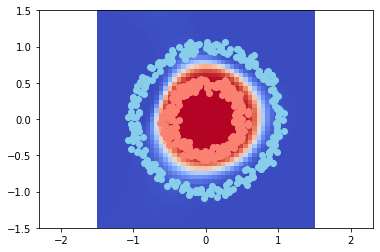

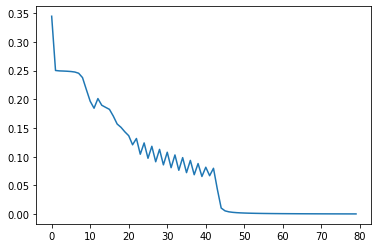

0.0004454588652714934
(500, 1)
(500, 8)
(500, 4)
0.00044498286073643635
(500, 1)
(500, 8)
(500, 4)
0.0004445078540848723
(500, 1)
(500, 8)
(500, 4)
0.00044403384216509226
(500, 1)
(500, 8)
(500, 4)
0.00044356082183873223
(500, 1)
(500, 8)
(500, 4)
0.000443088789980702
(500, 1)
(500, 8)
(500, 4)
0.00044261774347911586
(500, 1)
(500, 8)
(500, 4)
0.00044214767923521944
(500, 1)
(500, 8)
(500, 4)
0.00044167859416332627
(500, 1)
(500, 8)
(500, 4)
0.0004412104851907398
(500, 1)
(500, 8)
(500, 4)
0.00044074334925769314
(500, 1)
(500, 8)
(500, 4)
0.00044027718331727573
(500, 1)
(500, 8)
(500, 4)
0.00043981198433536904
(500, 1)
(500, 8)
(500, 4)
0.00043934774929057444
(500, 1)
(500, 8)
(500, 4)
0.00043888447517415253
(500, 1)
(500, 8)
(500, 4)
0.00043842215898994756
(500, 1)
(500, 8)
(500, 4)
0.000437960797754334
(500, 1)
(500, 8)
(500, 4)
0.0004375003884961381
(500, 1)
(500, 8)
(500, 4)
0.00043704092825658133
(500, 1)
(500, 8)
(500, 4)
0.0004365824140892094
(500, 1)
(500, 8)
(500, 4)
0.0004361

In [0]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm) # se crea una nueva red

loss = [] # se guardaran diferentes costes mientres se entrena para graficar

for i in range(2000): # cantidad de veces de entrenamiento

  #Entrenando la red
  pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

  if i% 25 == 0: #cada 25 iteraciones

    loss.append(l2_cost[0](pY,Y))

    res = 50    #resolucion

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n , np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0] #train False ya que es una predicion

    #Visualiza el entrenamiento
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0,1], c = "skyblue")
    plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1,1], c = "salmon")


    #Borra contenido para hacerlo animado
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)